# Condition of the Drivers in Baltimore Accidents based on Gender



## Introduction

In this project, we are working on the 2020 and 2021 vehicle crashes in Maryland with the help of three data sets: Maryland Statewise Vehicle crashes, Maryland Statewide Vehicle Crashes - Person Details (Anonymized), and Maryland Statewide Vehicle Crashes - Vehicle Details from https://opendata.maryland.gov/ .

## Analysis Setup Code

In [ ]:
# importing the libraries
from zipfile import ZipFile
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# getting the data zipfile from the github
!wget https://github.com/mguner/teaching/raw/main/datasets/MD_Crashes/Archive.zip

--2021-12-18 14:05:28--  https://github.com/mguner/teaching/raw/main/datasets/MD_Crashes/Archive.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mguner/teaching/main/datasets/MD_Crashes/Archive.zip [following]
--2021-12-18 14:05:28--  https://raw.githubusercontent.com/mguner/teaching/main/datasets/MD_Crashes/Archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51797738 (49M) [application/zip]
Saving to: ‘Archive.zip’

Archive.zip         100%[===================>]  49.40M  85.8MB/s    in 0.6s    

2021-12-18 14:05:31 (85.8 MB/s) - ‘Archive.zip’ saved [51797738/51797738]



In [ ]:
# extracting the csv files from the zipfile
file_path = '/content/Archive.zip'
with ZipFile(file_path, 'r') as zip: 
    # printing all the contents of the zip file
    zip.printdir()
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall(path = 'data') 
    print('Done!') 

File Name                                             Modified             Size
MD_Statewide_Vehicle_Crashes_20-21_Anonymized_Person_Details.csv 2021-10-29 14:51:46     92251025
MD_Statewide_Vehicle_Crashes_20-21_Vehicle_Details.csv 2021-10-29 14:52:34     73439262
MS_Statewide_Vehicle_Crashes_20.csv            2021-10-29 14:53:18     61883538
Extracting all the files now...
Done!


In [ ]:
# reading the csv files
people = pd.read_csv('data/MD_Statewide_Vehicle_Crashes_20-21_Anonymized_Person_Details.csv', index_col = 0)

vehicles = pd.read_csv('data/MD_Statewide_Vehicle_Crashes_20-21_Vehicle_Details.csv', index_col = 0)

crashes = pd.read_csv('data/MS_Statewide_Vehicle_Crashes_20.csv', index_col = 0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# people dataframe
people.head(2)

,SEX_DESC,SEX_CODE,CONDITION_DESC,CONDITION_CODE,INJ_SEVER_DESC,INJ_SEVER_CODE,REPORT_NO,OCC_SEAT_POS_DESC,OCC_SEAT_POS_CODE,PED_VISIBLE_DESC,PED_VISIBLE_CODE,PED_OBEY_DESC,PED_OBEY_CODE,PED_TYPE_DESC,PED_TYPE_CODE,PED_LOCATION_CODE,MOVEMENT_DESC,MOVEMENT_CODE,PERSON_TYPE_DESC,PERSON_TYPE,ALCOHOL_TEST_DESC,ALCOHOL_TEST_CODE,ALCOHOL_TESTTYPE_DESC,ALCOHOL_TESTTYPE_CODE,DRUG_TEST_DESC,DRUG_TEST_CODE,DRUG_TESTRESULT_DESC,DRUG_TESTRESULT_CODE,BAC_CODE,FAULT_FLAG_DESC,FAULT_FLAG,EQUIP_PROB_DESC,EQUIP_PROB_CODE,SAF_EQUIP_DESC,SAF_EQUIP_CODE,EJECT_DESC,EJECT_CODE,DATE_OF_BIRTH,PERSON_ID,LICENSE_STATE_CODE,CLASS,CDL_FLAG_DESC,CDL_FLAG,VEHICLE_ID,EMS_UNIT_LABEL,AIRBAG_DEPLOYED,YEAR,Quarter
1292840,Female,F,Apparently Normal,1.0,Possible Incapacitating Injury,3,DA32230016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver,D,Not Applicable,0.0,NaN,NaN,Not Applicable,0.0,NaN,NaN,NaN,True,Y,No Misuse,1.0,Shoulder/Lap Belt(s),13.0,Not Applicable,0.0,19911106.0,27cbd0fc-4de1-4170-a6e8-c3e138eae596,DC,NaN,False,False,f9da5041-07ea-4ca2-be6d-0c85166cbcf6,A,4.0,2020,Q1
1292841,NaN,NaN,Unknown,99.0,No Injury,1,DA40360040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver,D,Not Applicable,0.0,NaN,NaN,Not Applicable,0.0,NaN,NaN,NaN,True,Y,Unknown,99.0,Unknown,99.0,Unknown,99.0,NaN,0b91bf27-a20e-4c80-a338-59d819154a01,NaN,NaN,False,False,c146a0e1-8ae8-430d-a033-2f8d2bcba0fa,NaN,0.0,2020,Q1


In [ ]:
# selecting only the relevant columns from the people dataframe
people = people[['SEX_DESC', 'CONDITION_DESC', 'INJ_SEVER_DESC', 'REPORT_NO', 'PERSON_TYPE_DESC', 'EQUIP_PROB_DESC', 'SAF_EQUIP_DESC', 'EJECT_DESC', 'DATE_OF_BIRTH', 'PERSON_ID', 'VEHICLE_ID', 'AIRBAG_DEPLOYED']]
people.head(2)

,SEX_DESC,CONDITION_DESC,INJ_SEVER_DESC,REPORT_NO,PERSON_TYPE_DESC,EQUIP_PROB_DESC,SAF_EQUIP_DESC,EJECT_DESC,DATE_OF_BIRTH,PERSON_ID,VEHICLE_ID,AIRBAG_DEPLOYED
1292840,Female,Apparently Normal,Possible Incapacitating Injury,DA32230016,Driver,No Misuse,Shoulder/Lap Belt(s),Not Applicable,19911106.0,27cbd0fc-4de1-4170-a6e8-c3e138eae596,f9da5041-07ea-4ca2-be6d-0c85166cbcf6,4.0
1292841,NaN,Unknown,No Injury,DA40360040,Driver,Unknown,Unknown,Unknown,NaN,0b91bf27-a20e-4c80-a338-59d819154a01,c146a0e1-8ae8-430d-a033-2f8d2bcba0fa,0.0


In [ ]:
# vechicles dataframe
vehicles.head(2)

,HARM_EVENT_DESC,HARM_EVENT_CODE,CONTI_DIRECTION_DESC,CONTI_DIRECTION_CODE,DAMAGE_DESC,DAMAGE_CODE,MOVEMENT_DESC,MOVEMENT_CODE,VIN_NO,REPORT_NO,CV_BODY_TYPE_DESC,CV_BODY_TYPE_CODE,VEH_YEAR,VEH_MAKE,VEH_MODEL,COMMERCIAL_FLAG_DESC,COMMERCIAL_FLAG,HZM_NUM,TOWED_AWAY_FLAG_DESC,TOWED_AWAY_FLAG,NUM_AXLES,GVW_DESC,GVW_CODE,GOING_DIRECTION_DESC,GOING_DIRECTION_CODE,BODY_TYPE_DESC,BODY_TYPE_CODE,DRIVERLESS_FLAG_DESC,DRIVERLESS_FLAG,FIRE_FLAG_DESC,FIRE_FLAG,PARKED_FLAG_DESC,PARKED_FLAG,SPEED_LIMIT,HIT_AND_RUN_FLAG_DESC,HIT_AND_RUN_FLAG,HAZMAT_SPILL_FLAG_DESC,HAZMAT_SPILL_FLAG,VEHICLE_ID,TOWED_VEHICLE_CONFIG_DESC,TOWED_VEHICLE_CONFIG_CODE,AREA_DAMAGED_CODE_IMP1,AREA_DAMAGED_CODE1,AREA_DAMAGED_CODE2,AREA_DAMAGED_CODE3,AREA_DAMAGED_CODE_MAIN_DESC,AREA_DAMAGED_CODE_MAIN,YEAR,Quarter
0,Other Vehicle,1.0,North,N,Unknown,99,Unknown,99.0,NaN,AE5057004X,NaN,NaN,NaN,UNKNOWN,UNKNOWN,No,N,NaN,No,N,NaN,NaN,NaN,North,N,NaN,NaN,NaN,U,No,N,No,N,25,Yes,Y,NaN,NaN,47e2531d-8c69-470c-9198-502a46c7639e,Unknown,99,11.0,10.0,11.0,12.0,Eleven o'clock,11.0,2020,Q2
1,Other Vehicle,1.0,North,N,Superficial,2,Moving Constant Speed,1.0,NMTKHMBX0JR025092,MSP7221001P,NaN,NaN,2018.0,TOYOTA,CAMRY,No,N,NaN,No,N,NaN,NaN,NaN,North,N,Passenger Car,2.0,No,N,No,N,No,N,55,No,N,NaN,NaN,0dbd4a00-c7f2-4c34-b543-c2633fe0118f,Not Applicable,0,12.0,6.0,12.0,NaN,Twelve o'clock,12.0,2020,Q2


In [ ]:
# selecting only the relevant columns from the vechicles dataframe
vehicles = vehicles[['HARM_EVENT_DESC', 'CONTI_DIRECTION_DESC', 'DAMAGE_DESC', 'MOVEMENT_DESC', 'REPORT_NO', 'VEH_YEAR', 'VEH_MAKE', 'VEH_MODEL', 'GOING_DIRECTION_DESC', 'BODY_TYPE_DESC', 'SPEED_LIMIT', 'HIT_AND_RUN_FLAG_DESC', 'VEHICLE_ID']]
vehicles.head(2)

,HARM_EVENT_DESC,CONTI_DIRECTION_DESC,DAMAGE_DESC,MOVEMENT_DESC,REPORT_NO,VEH_YEAR,VEH_MAKE,VEH_MODEL,GOING_DIRECTION_DESC,BODY_TYPE_DESC,SPEED_LIMIT,HIT_AND_RUN_FLAG_DESC,VEHICLE_ID
0,Other Vehicle,North,Unknown,Unknown,AE5057004X,NaN,UNKNOWN,UNKNOWN,North,NaN,25,Yes,47e2531d-8c69-470c-9198-502a46c7639e
1,Other Vehicle,North,Superficial,Moving Constant Speed,MSP7221001P,2018.0,TOYOTA,CAMRY,North,Passenger Car,55,No,0dbd4a00-c7f2-4c34-b543-c2633fe0118f


In [ ]:
# crashes dataframe
crashes.head(2)

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,COLLISION_TYPE_DESC,COLLISION_TYPE_CODE,SURF_COND_DESC,SURF_COND_CODE,LANE_DESC,LANE_CODE,RD_COND_DESC,RD_COND_CODE,RD_DIV_DESC,RD_DIV_CODE,FIX_OBJ_DESC,FIX_OBJ_CODE,REPORT_NO,REPORT_TYPE,WEATHER_DESC,WEATHER_CODE,ACC_DATE,ACC_TIME,LOC_CODE,SIGNAL_FLAG_DESC,SIGNAL_FLAG,C_M_ZONE_FLAG,AGENCY_CODE,AREA_CODE,HARM_EVENT_DESC1,HARM_EVENT_CODE1,HARM_EVENT_DESC2,HARM_EVENT_CODE2,RTE_NO,ROUTE_TYPE_CODE,RTE_SUFFIX,LOG_MILE,LOGMILE_DIR_FLAG_DESC,LOGMILE_DIR_FLAG,MAINROAD_NAME,DISTANCE,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,Other,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,AE58770052,Property Damage Crash,Not Applicable,0.00,20200618,15:15:00,NaN,No,N,N,BACOPD,UNK,Parked Vehicle,2.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.277263,-76.503693,POINT (-76.5036932 39.27726285)
1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,Non Intersection,1.0,Other,88,Dry,2.0,Left Turn Lane,2.0,No Defects,1.0,One-way Trafficway,2.0,Other Pole,10.0,ADJ984001J,Injury Crash,NaN,7.01,20200430,06:39:00,1003,Yes,Y,N,BALTIMORE,UNK,Other Vehicle,1.0,Other Vehicle,1.0,NaN,NaN,NaN,0.0,NaN,NaN,CHARLES STREET,2.0,Miles,M,N,NaN,NaN,NaN,NORTH AVE,39.311025,-76.616429,POINT (-76.616429453205 39.311024794431)


In [ ]:
# selecting only the relevant columns from the crashes dataframe
crashes = crashes[['YEAR', 'QUARTER', 'LIGHT_DESC', 'COUNTY_DESC', 'COLLISION_TYPE_DESC',  'REPORT_NO', 'REPORT_TYPE', 'WEATHER_DESC', 'ACC_DATE', 'ACC_TIME', 'HARM_EVENT_DESC1', 'HARM_EVENT_DESC2', 'LOCATION']]
crashes.head(2)

,YEAR,QUARTER,LIGHT_DESC,COUNTY_DESC,COLLISION_TYPE_DESC,REPORT_NO,REPORT_TYPE,WEATHER_DESC,ACC_DATE,ACC_TIME,HARM_EVENT_DESC1,HARM_EVENT_DESC2,LOCATION
0,2020,Q2,Daylight,Baltimore,Other,AE58770052,Property Damage Crash,Not Applicable,20200618,15:15:00,Parked Vehicle,Not Applicable,POINT (-76.5036932 39.27726285)
1,2020,Q2,NaN,Baltimore City,Other,ADJ984001J,Injury Crash,NaN,20200430,06:39:00,Other Vehicle,Other Vehicle,POINT (-76.616429453205 39.311024794431)


In [ ]:
# merging the three dataframes on REPORT_NO column
merged = crashes.merge(people, on = 'REPORT_NO').merge(vehicles, on = 'REPORT_NO')
merged.head(2)

,YEAR,QUARTER,LIGHT_DESC,COUNTY_DESC,COLLISION_TYPE_DESC,REPORT_NO,REPORT_TYPE,WEATHER_DESC,ACC_DATE,ACC_TIME,HARM_EVENT_DESC1,HARM_EVENT_DESC2,LOCATION,SEX_DESC,CONDITION_DESC,INJ_SEVER_DESC,PERSON_TYPE_DESC,EQUIP_PROB_DESC,SAF_EQUIP_DESC,EJECT_DESC,DATE_OF_BIRTH,PERSON_ID,VEHICLE_ID_x,AIRBAG_DEPLOYED,HARM_EVENT_DESC,CONTI_DIRECTION_DESC,DAMAGE_DESC,MOVEMENT_DESC,VEH_YEAR,VEH_MAKE,VEH_MODEL,GOING_DIRECTION_DESC,BODY_TYPE_DESC,SPEED_LIMIT,HIT_AND_RUN_FLAG_DESC,VEHICLE_ID_y
0,2020,Q2,Daylight,Baltimore,Other,AE58770052,Property Damage Crash,Not Applicable,20200618,15:15:00,Parked Vehicle,Not Applicable,POINT (-76.5036932 39.27726285),NaN,Not Applicable,No Injury,Driver,Unknown,Unknown,Not Applicable,NaN,53715bb2-0082-4089-9a9e-62eabfd94dc8,3c9e8766-8b2a-4774-b85c-c645f2eabba0,0.0,Other Vehicle,NaN,Superficial,Parked,2019.0,TOY,C-HR,NaN,Passenger Car,5,No,1b3ba369-a3ef-4e2d-b47d-ebbb96d59917
1,2020,Q2,Daylight,Baltimore,Other,AE58770052,Property Damage Crash,Not Applicable,20200618,15:15:00,Parked Vehicle,Not Applicable,POINT (-76.5036932 39.27726285),NaN,Not Applicable,No Injury,Driver,Unknown,Unknown,Not Applicable,NaN,53715bb2-0082-4089-9a9e-62eabfd94dc8,3c9e8766-8b2a-4774-b85c-c645f2eabba0,0.0,Other Vehicle,West,Superficial,Parking,NaN,UNKNOWN,UNKNOWN,West,Unknown,5,Yes,3c9e8766-8b2a-4774-b85c-c645f2eabba0


In [ ]:
# converting all the dates and times to correct format.

# converting accident date to datetime object
merged['ACC_DATE'] =  pd.to_datetime(merged['ACC_DATE'], format='%Y%m%d')
# creating a new column with date and time of the accidents as datetime object
merged['ACC_DATETIME'] = pd.to_datetime(merged['ACC_DATE'].astype(str)+ ' ' + merged['ACC_TIME'])
# converting the date of birth to datetime object
merged['DATE_OF_BIRTH'] =  pd.to_datetime(merged['DATE_OF_BIRTH'], format='%Y%m%d')
# creating a new column AGE by using the date of birth column
now = pd.to_datetime('now')
merged['AGE'] = merged['DATE_OF_BIRTH'].apply(lambda x : (now.year - x.year))  

In [ ]:
# final merged maryland crashes dataframe
merged.head(2)

,YEAR,QUARTER,LIGHT_DESC,COUNTY_DESC,COLLISION_TYPE_DESC,REPORT_NO,REPORT_TYPE,WEATHER_DESC,ACC_DATE,ACC_TIME,HARM_EVENT_DESC1,HARM_EVENT_DESC2,LOCATION,SEX_DESC,CONDITION_DESC,INJ_SEVER_DESC,PERSON_TYPE_DESC,EQUIP_PROB_DESC,SAF_EQUIP_DESC,EJECT_DESC,DATE_OF_BIRTH,PERSON_ID,VEHICLE_ID_x,AIRBAG_DEPLOYED,HARM_EVENT_DESC,CONTI_DIRECTION_DESC,DAMAGE_DESC,MOVEMENT_DESC,VEH_YEAR,VEH_MAKE,VEH_MODEL,GOING_DIRECTION_DESC,BODY_TYPE_DESC,SPEED_LIMIT,HIT_AND_RUN_FLAG_DESC,VEHICLE_ID_y,ACC_DATETIME,AGE
0,2020,Q2,Daylight,Baltimore,Other,AE58770052,Property Damage Crash,Not Applicable,2020-06-18,15:15:00,Parked Vehicle,Not Applicable,POINT (-76.5036932 39.27726285),NaN,Not Applicable,No Injury,Driver,Unknown,Unknown,Not Applicable,NaT,53715bb2-0082-4089-9a9e-62eabfd94dc8,3c9e8766-8b2a-4774-b85c-c645f2eabba0,0.0,Other Vehicle,NaN,Superficial,Parked,2019.0,TOY,C-HR,NaN,Passenger Car,5,No,1b3ba369-a3ef-4e2d-b47d-ebbb96d59917,2020-06-18 15:15:00,NaN
1,2020,Q2,Daylight,Baltimore,Other,AE58770052,Property Damage Crash,Not Applicable,2020-06-18,15:15:00,Parked Vehicle,Not Applicable,POINT (-76.5036932 39.27726285),NaN,Not Applicable,No Injury,Driver,Unknown,Unknown,Not Applicable,NaT,53715bb2-0082-4089-9a9e-62eabfd94dc8,3c9e8766-8b2a-4774-b85c-c645f2eabba0,0.0,Other Vehicle,West,Superficial,Parking,NaN,UNKNOWN,UNKNOWN,West,Unknown,5,Yes,3c9e8766-8b2a-4774-b85c-c645f2eabba0,2020-06-18 15:15:00,NaN


## Analysis

In this project, we are going to analyse,
- Which counties has most number of accidents and which counties have least number of accidents and select the county with the most accidents.
- The Weather conditions of the accidents and also the condition of the drivers during the accidents in the most accidents county.
- Then based on the above conditions, see if the accidents day and time pay any role in the accidents.
- Then compare the drivers under different conditions and based on the gender of the drivers.

First let us see the number of accidents in different counties, to see if there is any significant difference in the number of accidents and find the county with the most number of accidents.

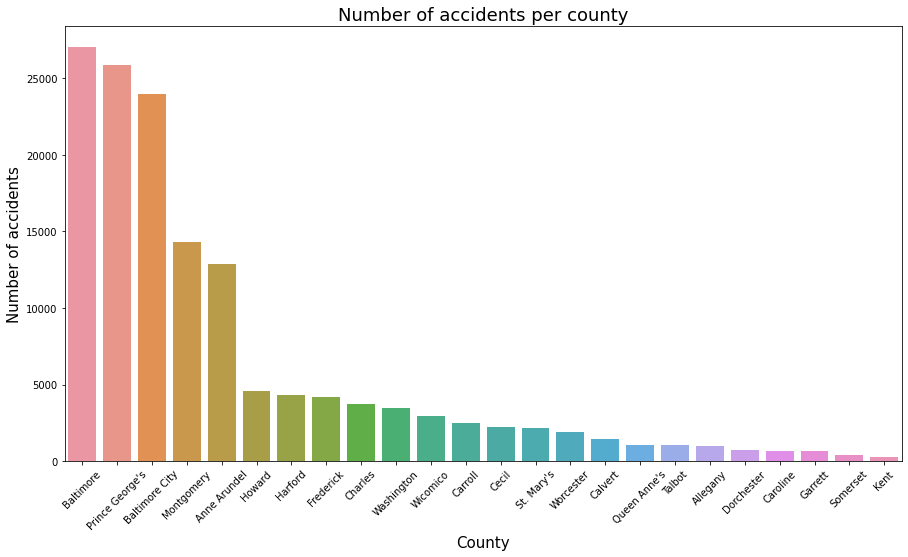

In [ ]:
# number of accidents for county
counties = merged.drop_duplicates(subset = ['REPORT_NO'])['COUNTY_DESC'].value_counts()

# barchart for the number of accidents for counties
sns.barplot(x = counties.index, y = counties.values)
plt.title('Number of accidents per county', fontsize = 18)
plt.xlabel('County', fontsize=15)
plt.ylabel('Number of accidents', fontsize=15)
plt.xticks(rotation = 45)
plt.gcf().set_size_inches(15, 8)
plt.show()

This chart represents the number of accidents reported in each county.

From this chart,
- We can see that Baltimore, Prince George's and Baltimore City has the most number of accidents and Garrett, Somerset and Kent have the least number of accidents.
- These are the top 3 and bottom 3 interms of the accidents count.

We can see that there is a significant difference between the number of accidents in the top counties and bottom counties, here tha main reason could also be the population difference between the counties, for example Baltimore has a population of 827,370 whereas Kent has only a population of 19,536.

So, we can see that Baltimore has the most number of accidents. Now lets take a look at the weather condition, drivers condition and day and time of these accidents.

In [ ]:
# dataframe for the accidents occured in Baltimore county
baltimore = merged[merged['COUNTY_DESC'] == 'Baltimore']
baltimore.head(2)

,YEAR,QUARTER,LIGHT_DESC,COUNTY_DESC,COLLISION_TYPE_DESC,REPORT_NO,REPORT_TYPE,WEATHER_DESC,ACC_DATE,ACC_TIME,HARM_EVENT_DESC1,HARM_EVENT_DESC2,LOCATION,SEX_DESC,CONDITION_DESC,INJ_SEVER_DESC,PERSON_TYPE_DESC,EQUIP_PROB_DESC,SAF_EQUIP_DESC,EJECT_DESC,DATE_OF_BIRTH,PERSON_ID,VEHICLE_ID_x,AIRBAG_DEPLOYED,HARM_EVENT_DESC,CONTI_DIRECTION_DESC,DAMAGE_DESC,MOVEMENT_DESC,VEH_YEAR,VEH_MAKE,VEH_MODEL,GOING_DIRECTION_DESC,BODY_TYPE_DESC,SPEED_LIMIT,HIT_AND_RUN_FLAG_DESC,VEHICLE_ID_y,ACC_DATETIME,AGE
0,2020,Q2,Daylight,Baltimore,Other,AE58770052,Property Damage Crash,Not Applicable,2020-06-18,15:15:00,Parked Vehicle,Not Applicable,POINT (-76.5036932 39.27726285),NaN,Not Applicable,No Injury,Driver,Unknown,Unknown,Not Applicable,NaT,53715bb2-0082-4089-9a9e-62eabfd94dc8,3c9e8766-8b2a-4774-b85c-c645f2eabba0,0.0,Other Vehicle,NaN,Superficial,Parked,2019.0,TOY,C-HR,NaN,Passenger Car,5,No,1b3ba369-a3ef-4e2d-b47d-ebbb96d59917,2020-06-18 15:15:00,NaN
1,2020,Q2,Daylight,Baltimore,Other,AE58770052,Property Damage Crash,Not Applicable,2020-06-18,15:15:00,Parked Vehicle,Not Applicable,POINT (-76.5036932 39.27726285),NaN,Not Applicable,No Injury,Driver,Unknown,Unknown,Not Applicable,NaT,53715bb2-0082-4089-9a9e-62eabfd94dc8,3c9e8766-8b2a-4774-b85c-c645f2eabba0,0.0,Other Vehicle,West,Superficial,Parking,NaN,UNKNOWN,UNKNOWN,West,Unknown,5,Yes,3c9e8766-8b2a-4774-b85c-c645f2eabba0,2020-06-18 15:15:00,NaN


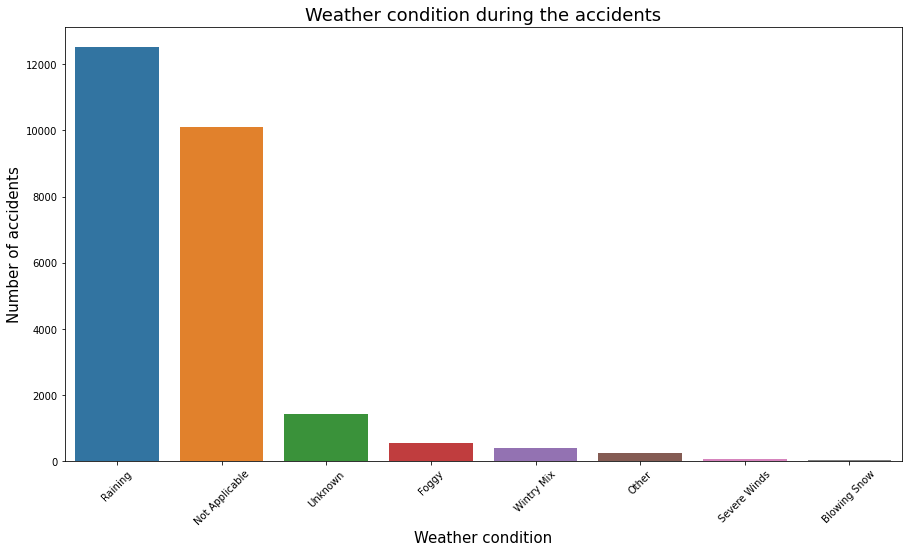

In [ ]:
# weather condition during the accidents
weather_condition = baltimore['WEATHER_DESC'].value_counts(dropna = False)

# barchart for the weather condition during the accidents
sns.barplot(x = weather_condition.index, y = weather_condition.values)
plt.title('Weather condition during the accidents', fontsize = 18)
plt.xlabel('Weather condition', fontsize=15)
plt.ylabel('Number of accidents', fontsize=15)
plt.xticks(rotation = 45)
plt.gcf().set_size_inches(15, 8)
plt.show()

This chart represents the weather condition during the accidents.

From this chart,
- We can see that most of the accidents have occured when it was Raining and also most of the accidents after Raining occured when the weather condition is Not applicable.

Most number of accidents are caused when it is raining, now lets take a look the condition of the drivers during accident.

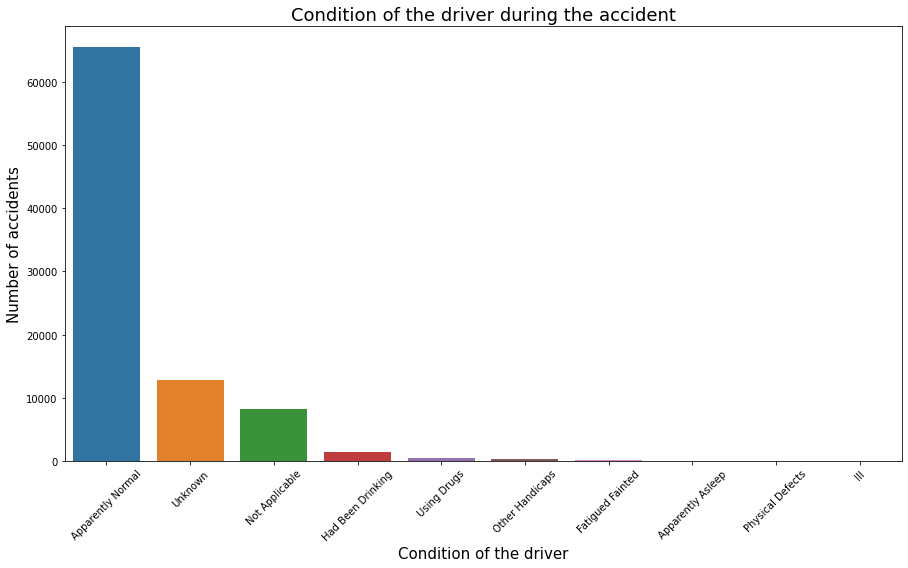

In [ ]:
# condition of the drivers during the accident
driver_conditions = baltimore['CONDITION_DESC'].value_counts()

# barchart for the condition of the drivers while driving
sns.barplot(x = driver_conditions.index, y = driver_conditions.values)
plt.title('Condition of the driver during the accident', fontsize = 18)
plt.xlabel('Condition of the driver', fontsize=15)
plt.ylabel('Number of accidents', fontsize=15)
plt.xticks(rotation = 45)
plt.gcf().set_size_inches(15, 8)
plt.show()

This chart represents the Condition of the drivers during the accidents.

From the chart,
- We can see that surprisingly most of the accidents have occured when the condition of the drivers is apparently arently normal.
- We expected most of the accidents would be caused when the driver is under influence of something or is distracted.


>Most of the accidents have occured when it is raining but the condition of the drivers is normal.

>To get more insight, Now lets take a look at on which day of the week and hour of the day most of the accidents occur.

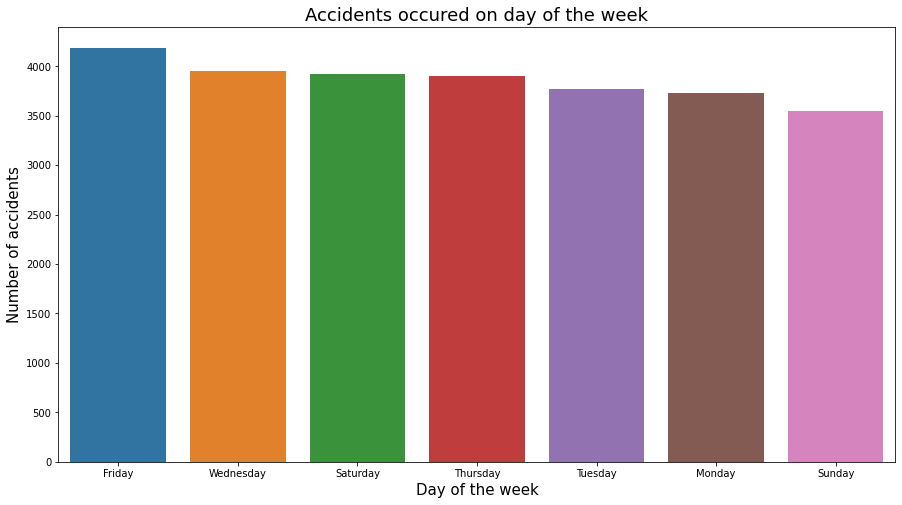

In [ ]:
# accidents occured on day of the week
accident_day = baltimore.drop_duplicates(['REPORT_NO'])['ACC_DATETIME'].dt.day_name().value_counts()

# barchart for accidents occured on day of the week
sns.barplot(x = accident_day.index, y = accident_day.values)
plt.title('Accidents occured on day of the week', fontsize = 18)
plt.xlabel('Day of the week', fontsize=15)
plt.ylabel('Number of accidents', fontsize=15)
plt.gcf().set_size_inches(15, 8)
plt.show()

This chart represents the number of accidents occured on which day of the week.
From the chart,
- We can see that most of the accidents have occured on Friday, It is the day before the weekend.

Lets see on which hour of the day most of the accidents occur.

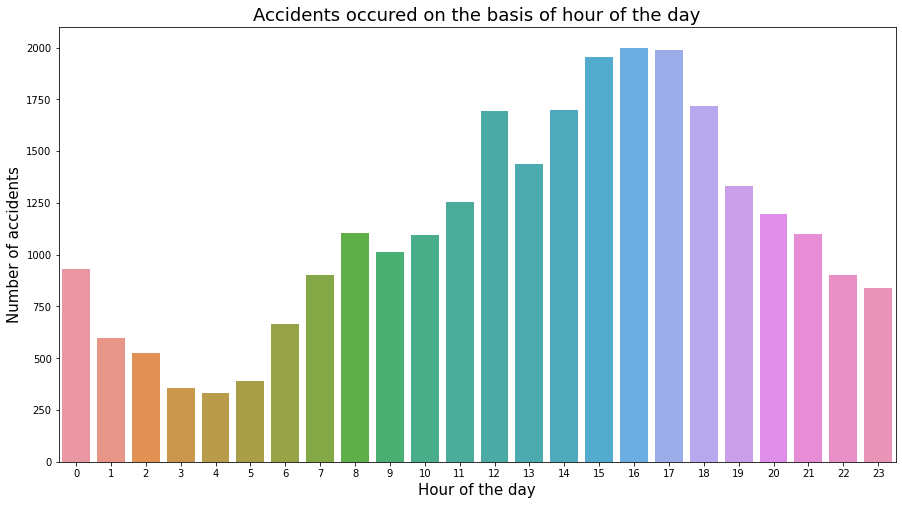

In [ ]:
# accidents occured on hour of the day
accident_hour = baltimore.drop_duplicates(['REPORT_NO'])['ACC_DATETIME'].dt.hour.value_counts()

# barchart for accidents occured on hour of the day
sns.barplot(x = accident_hour.index, y = accident_hour.values)
plt.title('Accidents occured on the basis of hour of the day', fontsize = 18)
plt.xlabel('Hour of the day', fontsize=15)
plt.ylabel('Number of accidents', fontsize=15)
plt.gcf().set_size_inches(15, 8)
plt.show()

This chart represents the number of accident occured on which hour of the day.

From the chart,
- We can accidents occurred on the 15th, 16th, 17th hour of the day, It means most of the accidents occured on the evening.

So we can see that most of the accidents have occurred on Friday evening time.
Evening right before the weenkend, people could be in a hurry to reach home after the week of work or going to a party or going to someplace for the weekend something like that.

So lets take a look into the gender of the drivers with different conditions of the driver.
Before that lets take a look at the gender of the drivers invoved in the accidents.

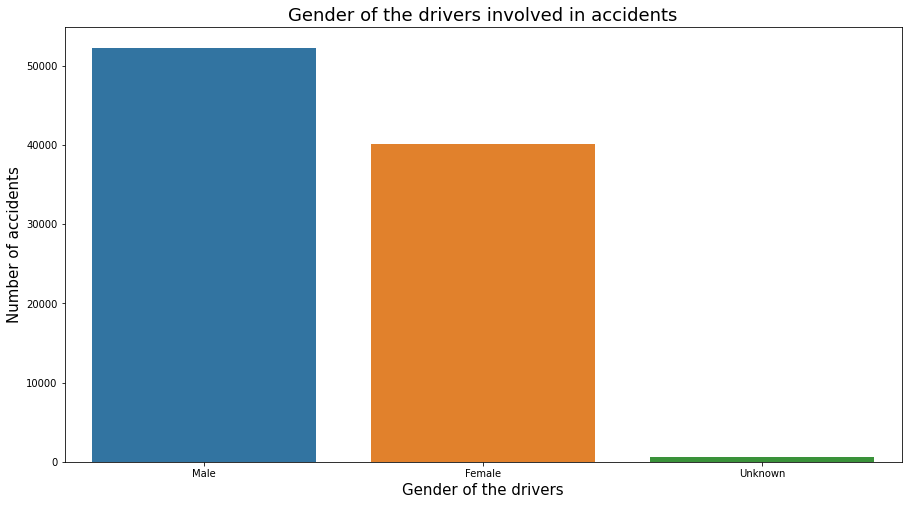

In [ ]:
# gender of the drivers involved in accidents
drivers_gender = baltimore['SEX_DESC'].value_counts()

# barchart for the gender of the drivers involved in accidents
sns.barplot(x = drivers_gender.index, y = drivers_gender.values)
plt.title('Gender of the drivers involved in accidents', fontsize = 18)
plt.xlabel('Gender of the drivers', fontsize=15)
plt.ylabel('Number of accidents', fontsize=15)
plt.gcf().set_size_inches(15, 8)
plt.show()

This chart represents the gender of the drivers involved in the accidents.

From the chart,
- We can see that males are more invoved in the accidents compared to the females.

Now lets take a look into the gender of the drivers with different conditions of the driver.

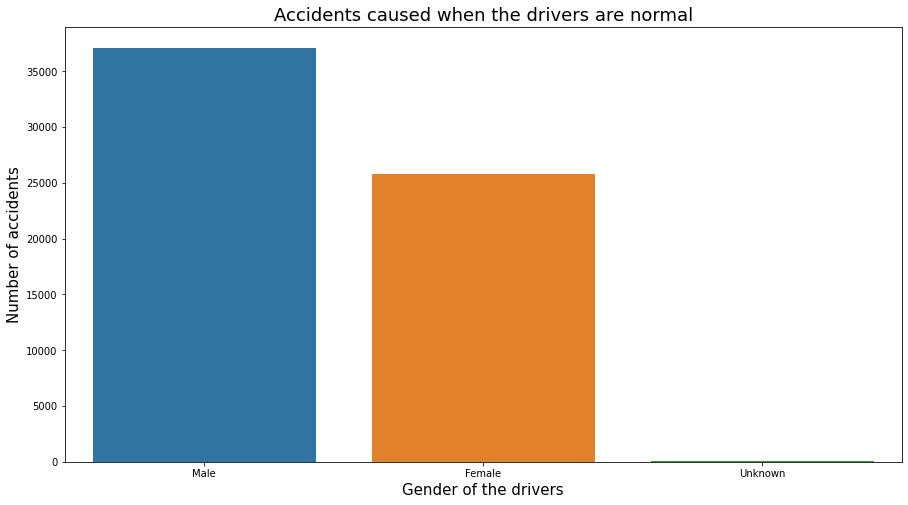

In [ ]:
# gender of the drivers involved in the accidents who are apparently normal
normal_drivers = baltimore[baltimore['CONDITION_DESC'] == 'Apparently Normal']['SEX_DESC'].value_counts()

# barchart for accidents caused when the drivers are normal
sns.barplot(x = normal_drivers.index, y = normal_drivers.values)
plt.title('Accidents caused when the drivers are normal', fontsize = 18)
plt.xlabel('Gender of the drivers', fontsize=15)
plt.ylabel('Number of accidents', fontsize=15)
plt.gcf().set_size_inches(15, 8)
plt.show()

This chart represents the gender of the drivers involved in the accidents when the condition of the driver is normal.

From the chart,
- We can see that males are more invoved in the accidents compared to the females, almost double the number when the drivers are in normal condition.

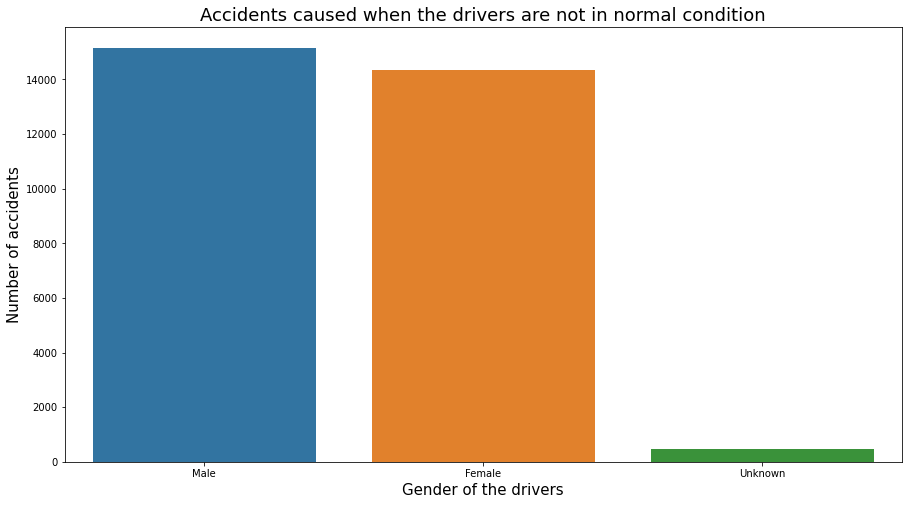

In [ ]:
# gender of the drivers involved in the accidents who not in normal condition
notnormal_drivers = baltimore[baltimore['CONDITION_DESC'] != 'Apparently Normal']['SEX_DESC'].value_counts()

# barchart for accidents caused when the drivers are not in normal condition
sns.barplot(x = notnormal_drivers.index, y = notnormal_drivers.values)
plt.title('Accidents caused when the drivers are not in normal condition', fontsize = 18)
plt.xlabel('Gender of the drivers', fontsize=15)
plt.ylabel('Number of accidents', fontsize=15)
plt.gcf().set_size_inches(15, 8)
plt.show()

This chart represents the gender of the drivers involved in the accidents when the condition of the driver is not normal.

From the chart,
- We can see that males are involved in most of the accidents compared to the females.
- Even though, there is a difference in the number of accidents caused by male and female drivers, the difference is not as big as it is in the case of the drivers who are in normal condition during driving.

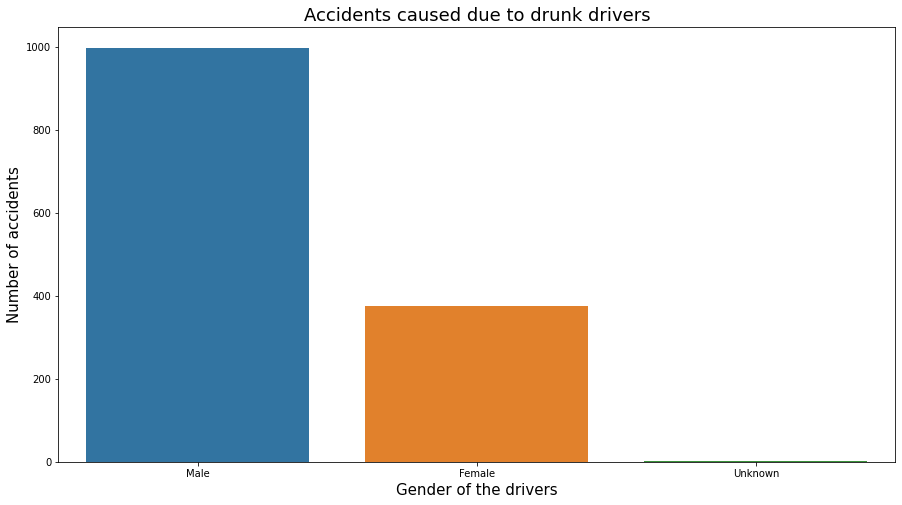

In [ ]:
# gender of the drivers involved in the accidents due to drunk driving
drunk_drivers = baltimore[baltimore['CONDITION_DESC'] == 'Had Been Drinking']['SEX_DESC'].value_counts()

# barchart for accidents caused due to the drunk drivers
sns.barplot(x = drunk_drivers.index, y = drunk_drivers.values)
plt.title('Accidents caused due to drunk drivers', fontsize = 18)
plt.xlabel('Gender of the drivers', fontsize=15)
plt.ylabel('Number of accidents', fontsize=15)
plt.gcf().set_size_inches(15, 8)
plt.show()

This chart represents the gender of the drivers involved in the accidents when the driver had been drinking.

From the chart,
- We can see that male drivers are involved in most number of drunk driving accidents compared to the female drivers.

The difference in the number of accidents caused by male and female drivers is very large when the drivers are in normal condition but it is not that significant when the condition of the drivers is not normal. 

So we expected there won't be a significant difference in the number of accidents caused by male and female drivers when they are drunk but we can see that there is a large difference in the number of accidents caused by the male and female drivers when they are drunk.

So it means that female drivers are could be distracted with various reasons for example there could be a child in the car or they might be on a call.

So we can say that men cause most of the accidents due to drinking, whereas women cause more number of accidents due to some other kind of distraction or handicapped compared to their drunk driving accidents. 

## Results Summary

We found that Baltimore, Prince George’s, and Baltimore City had the most number of accidents compared to Garrett, Somerset, and Kent county with the least number of accidents. Since Baltimore County has the most accidents in Maryland we decided to focus on the conditions of the accidents for it specifically. We found that the most common weather condition for accidents is rain, the condition of the drivers is apparently normal, and most accidents occur on Fridays from 3-5 pm. After collecting this information we looked at different conditions of the drivers based on gender and found that men cause the most accidents than women. There was not much of a difference between the accidents caused by men and women when they are not in normal conditions but there is a large difference in the number of accidents caused by men than women due to drunk driving. Women cause less accidents compared to men, and when they do it tends to be due to distracted driving or some handicap or other condition and not many drunk driving accidents. 

In [ ]:
# This is the user interactive cell, where user can give a report number they want as input and get the data of that report.
# example REPORT_NO - AE58770052, MSP6709008R, AC2358001F, EJ7878001D, DA39930081

REPORT_NUMBER = input(str('Enter report no: '))
merged[merged['REPORT_NO'] == REPORT_NUMBER]

Enter report no: AE58770052


,YEAR,QUARTER,LIGHT_DESC,COUNTY_DESC,COLLISION_TYPE_DESC,REPORT_NO,REPORT_TYPE,WEATHER_DESC,ACC_DATE,ACC_TIME,HARM_EVENT_DESC1,HARM_EVENT_DESC2,LOCATION,SEX_DESC,CONDITION_DESC,INJ_SEVER_DESC,PERSON_TYPE_DESC,EQUIP_PROB_DESC,SAF_EQUIP_DESC,EJECT_DESC,DATE_OF_BIRTH,PERSON_ID,VEHICLE_ID_x,AIRBAG_DEPLOYED,HARM_EVENT_DESC,CONTI_DIRECTION_DESC,DAMAGE_DESC,MOVEMENT_DESC,VEH_YEAR,VEH_MAKE,VEH_MODEL,GOING_DIRECTION_DESC,BODY_TYPE_DESC,SPEED_LIMIT,HIT_AND_RUN_FLAG_DESC,VEHICLE_ID_y,ACC_DATETIME,AGE
0,2020,Q2,Daylight,Baltimore,Other,AE58770052,Property Damage Crash,Not Applicable,2020-06-18,15:15:00,Parked Vehicle,Not Applicable,POINT (-76.5036932 39.27726285),NaN,Not Applicable,No Injury,Driver,Unknown,Unknown,Not Applicable,NaT,53715bb2-0082-4089-9a9e-62eabfd94dc8,3c9e8766-8b2a-4774-b85c-c645f2eabba0,0.0,Other Vehicle,NaN,Superficial,Parked,2019.0,TOY,C-HR,NaN,Passenger Car,5,No,1b3ba369-a3ef-4e2d-b47d-ebbb96d59917,2020-06-18 15:15:00,NaN
1,2020,Q2,Daylight,Baltimore,Other,AE58770052,Property Damage Crash,Not Applicable,2020-06-18,15:15:00,Parked Vehicle,Not Applicable,POINT (-76.5036932 39.27726285),NaN,Not Applicable,No Injury,Driver,Unknown,Unknown,Not Applicable,NaT,53715bb2-0082-4089-9a9e-62eabfd94dc8,3c9e8766-8b2a-4774-b85c-c645f2eabba0,0.0,Other Vehicle,West,Superficial,Parking,NaN,UNKNOWN,UNKNOWN,West,Unknown,5,Yes,3c9e8766-8b2a-4774-b85c-c645f2eabba0,2020-06-18 15:15:00,NaN
